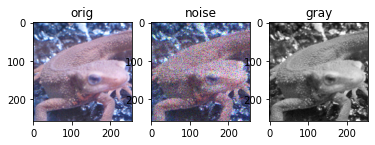

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

### Q.11 平滑化フィルタ

ノイズ画像に対して、平滑化フィルタ(5x5)をかけよ。

平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタである。

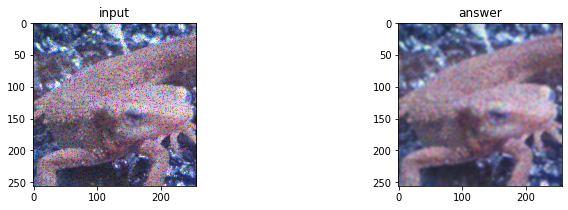

In [2]:
# answer
def filter_smooth(img, ksize=(3, 3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = np.mean(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic])
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_smoth = filter_smooth(img_noise, (5, 5))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

#### カーネルサイズを変えてみる
カーネルサイズを大きくすると、ノイズが消えると同時に画像がぼやけるようになる。

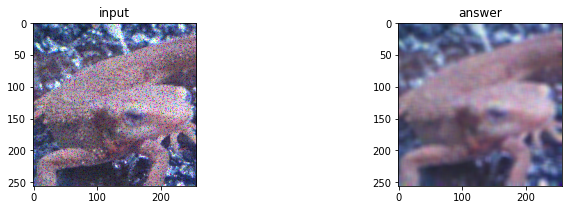

In [3]:
img_smooth = filter_smooth(img_noise, (9, 9))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smooth)
plt.show()

### Q.12 モーションフィルタ

モーションフィルタ(5x5)を実装せよ。

モーションフィルタとは対角方向の平均値を取るフィルタであり、k x kのフィルタは次式で定義される。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/motion_filter_equ.png"/>

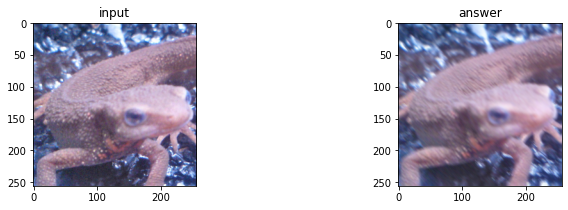

In [8]:
# answer 2
def filter_motion(img, k_size=(3, 3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = k_size
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # define kernel
    k = np.zeros(k_size) 
    k[range(k_size[0]), range(k_size[0])] = 1 / k_size[0]

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = np.sum(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic] * k)
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_motion = filter_motion(img_orig, (5, 5))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_motion)
plt.show()

### Q.13 Max-Minフィルタ
グレースケールに対してMAX-MINフィルタ(3x3)を実装せよ。

MAX-MINフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、エッジ検出のフィルタの一つである。

エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を特徴抽出と呼ぶ。

エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

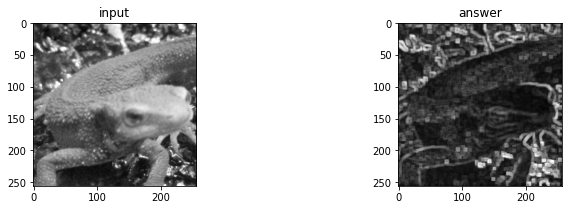

In [9]:
# answer
def filter_max_min(img, ksize=(5, 5)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    if len(_img.shape) == 2:
        _img = np.expand_dims(_img, axis=-1)

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].max() - _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].min()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_mm = filter_max_min(img_gray, (5, 5))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_mm[..., 0], cmap='gray')
plt.show()

### Q.14 微分フィルタ
グレースケールに対して、微分フィルタ(3x3)を実装せよ。

微分フィルタは輝度の急激な変化が起こっている部分のエッジを取り出すフィルタであり、隣り合う画素同士の差を取る。赤線のR成分を取り出すと輪郭や、目の境目など色が変わる部分でR値が急激に変化している。この部分がエッジとなる。

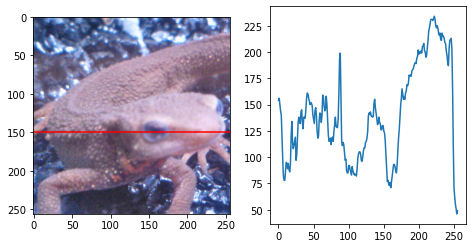

In [10]:
_w = img_orig.shape[1]
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.plot(np.arange(_w), [150] * _w, color='red')
plt.subplot(1, 3, 2); plt.plot(np.arange(_w), img_orig[150, :, 0])
plt.show()

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/diff_filter_equ.png"/>

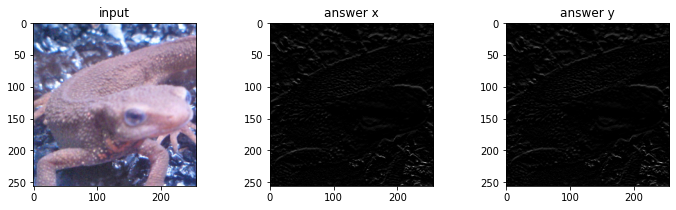

In [11]:
# answer
def filter_diff(img, mode='y'):
    kernel = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])
    if mode == 'y':
        kernel = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
    return cv2.filter2D(img, -1, kernel) 
  
img_diff_x = filter_diff(img_gray)
img_diff_y = filter_diff(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_diff_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_diff_y, cmap='gray')
plt.show()

### Q.15 プリューウィットフィルタ
グレースケールに対して、Prewittフィルタ(5x5)を実装せよ。

Prewitt(プレウィット)フィルタはエッジ抽出フィルタの一種であり、カーネルサイズk x kでは次式で定義される。
<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/prewitt_filter_equ.png"/>

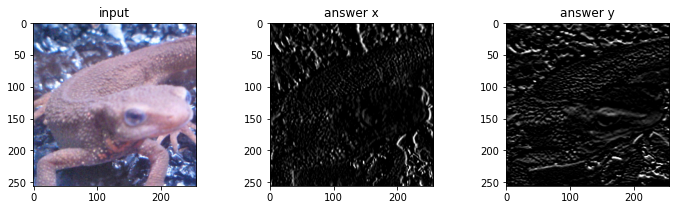

In [12]:
# answer
def filter_prewitt(img, k_size=(3, 3), mode='x'):
    k = np.zeros(k_size)
    if mode == 'x':
        k[:, 0] = 1
        k[:, -1] = -1
    else:
        k[0] = 1
        k[-1] = -1
    return cv2.filter2D(img, -1, k) 
  
img_prewitt_x = filter_prewitt(img_gray)
img_prewitt_y = filter_prewitt(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_prewitt_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_prewitt_y, cmap='gray')
plt.show()

### Q.16 ソーベルフィルタ
グレースケール に対して、Sobelフィルタ(3x3)を実装せよ。

Sobelフィルタもエッジを抽出するフィルタであり、次式でそれぞれ定義される。 これはprewittフィルタの中心部分に重みをつけたフィルタである。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/sobel_filter_equ.png" width="500"/>

### Q.17 ラプラシアンフィルタ
グレースケールに対して、Laplacianフィルタを実装せよ。

Laplacianフィルタとは輝度の二次微分をとることでエッジ検出を行うフィルタである。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/laplacian_filter_equ.png" width="600"/>

### Q.18 エンボスフィルタ
グレースケールに対して、Embossフィルタを実装せよ。

Embossフィルタとは輪郭部分を浮き出しにするフィルタで、次式で定義される。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/emboss_filter_equ.png"/>

### Q.19 LoGフィルタ
LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、imori_noise_256x256.pngのエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

Laplcianフィルタは二次微分をとるのでノイズが強調されるのを防ぐために、予めGaussianフィルタでノイズを抑える。LoGフィルタは次式で定義される。

<img src="https://github.com/TakuroTerui/Gasyori100knock/raw/master/questions/question_11_20/images/log_filter_equ.png" width="600"/>

#### カーネルのパラメータを変える
カーネルサイズを大きくすると画像が暗くなるが、$\sigma$を大きくするとノイズが消えて、かつ画像も明るくなった。

#### Laplacian + Gaussian との比較

### Q.20 ヒストグラム表示
matplotlibを用いてimori_256x256_dark.pngのヒストグラムを表示せよ。

ヒストグラムとは画素の出現回数をグラフにしたものである。 matplotlibではhist()という関数がすでにあるので、それを利用する。